- https://www.kaggle.com/uciml/electric-power-consumption-data-set

In [98]:
import pandas as pd
import numpy as np

In [99]:
df=pd.read_csv('data_test.csv')
df=df.iloc[-500:-1,:]

In [100]:
df['date_time'] = pd.to_datetime(df['Date'] + ' ' + df['Time'])
df = df.set_index('date_time')
df = df[['Global_active_power']]
df = df.dropna()
df.columns = ['y']

In [101]:
df.head()

,y
date_time,
2010-11-26 12:42:00,1.342
2010-11-26 12:43:00,1.360
2010-11-26 12:44:00,1.360
2010-11-26 12:45:00,1.366
2010-11-26 12:46:00,1.306


In [102]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_scl = df.copy()
df_scl['y'] = scaler.fit_transform(df_scl[['y']])
display(df_scl.head())

,y
date_time,
2010-11-26 12:42:00,0.440157
2010-11-26 12:43:00,0.447244
2010-11-26 12:44:00,0.447244
2010-11-26 12:45:00,0.449606
2010-11-26 12:46:00,0.425984


In [103]:
dft = df_scl.copy()
window_size = 30
for i in range(1,window_size+1):
    col = f"X{i}" 
    dft[col] = dft.iloc[:,0].shift(i)
display(dft.head())

,y,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X21,X22,X23,X24,X25,X26,X27,X28,X29,X30
date_time,,,,,,,,,,,,,,,,,,,,,
2010-11-26 12:42:00,0.440157,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-11-26 12:43:00,0.447244,0.440157,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-11-26 12:44:00,0.447244,0.447244,0.440157,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-11-26 12:45:00,0.449606,0.447244,0.447244,0.440157,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-11-26 12:46:00,0.425984,0.449606,0.447244,0.447244,0.440157,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [104]:
dft = dft.dropna()
display(dft.head())

,y,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X21,X22,X23,X24,X25,X26,X27,X28,X29,X30
date_time,,,,,,,,,,,,,,,,,,,,,
2010-11-26 13:12:00,0.459055,0.472441,0.477953,0.480315,0.474016,0.440945,0.433858,0.428346,0.429921,0.408661,...,0.407087,0.407087,0.412598,0.420472,0.418898,0.425984,0.449606,0.447244,0.447244,0.440157
2010-11-26 13:13:00,0.459843,0.459055,0.472441,0.477953,0.480315,0.474016,0.440945,0.433858,0.428346,0.429921,...,0.408661,0.407087,0.407087,0.412598,0.420472,0.418898,0.425984,0.449606,0.447244,0.447244
2010-11-26 13:14:00,0.458268,0.459843,0.459055,0.472441,0.477953,0.480315,0.474016,0.440945,0.433858,0.428346,...,0.412598,0.408661,0.407087,0.407087,0.412598,0.420472,0.418898,0.425984,0.449606,0.447244
2010-11-26 13:15:00,0.455906,0.458268,0.459843,0.459055,0.472441,0.477953,0.480315,0.474016,0.440945,0.433858,...,0.411024,0.412598,0.408661,0.407087,0.407087,0.412598,0.420472,0.418898,0.425984,0.449606
2010-11-26 13:16:00,0.453543,0.455906,0.458268,0.459843,0.459055,0.472441,0.477953,0.480315,0.474016,0.440945,...,0.412598,0.411024,0.412598,0.408661,0.407087,0.407087,0.412598,0.420472,0.418898,0.425984


In [105]:
X = dft.iloc[:,1:].values
y = dft.iloc[:,0].values
y = y.reshape(-1,1)
print(X.shape)
print(y.shape)

(469, 30)
(469, 1)


In [106]:
n_rows = X.shape[0]
train_size = int(n_rows * 0.80)
test_size = n_rows - train_size

X_train = X[0:train_size, :]
y_train = y[0:train_size, :]

X_test = X[train_size:, :]
y_test = y[train_size:, :]

In [107]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(375, 30)
(375, 1)
(94, 30)
(94, 1)


In [108]:
import math
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import *

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from tensorflow.keras.callbacks import EarlyStopping

In [109]:
# reshape input to be [samples, time steps, features]
X_train = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])


#X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
#X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)


In [110]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(375, 1, 30)
(375, 1)
(94, 1, 30)
(94, 1)


In [111]:
model = Sequential()
model.add(LSTM(100, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

history = model.fit(X_train, y_train, epochs=100, batch_size=70, validation_data=(X_test, y_test), 
                    callbacks=[EarlyStopping(monitor='val_loss', patience=10)], verbose=1, shuffle=False)

model.summary()

Epoch 1/100
6/6 [==============================] - 0s 61ms/step - loss: 0.1300 - val_loss: 0.0425
Epoch 2/100
6/6 [==============================] - 0s 5ms/step - loss: 0.0316 - val_loss: 0.0307
Epoch 3/100
6/6 [==============================] - 0s 5ms/step - loss: 0.0370 - val_loss: 0.0335
Epoch 4/100
6/6 [==============================] - 0s 4ms/step - loss: 0.0298 - val_loss: 0.0216
Epoch 5/100
6/6 [==============================] - 0s 5ms/step - loss: 0.0237 - val_loss: 0.0230
Epoch 6/100
6/6 [==============================] - 0s 4ms/step - loss: 0.0249 - val_loss: 0.0216
Epoch 7/100
6/6 [==============================] - 0s 5ms/step - loss: 0.0218 - val_loss: 0.0188
Epoch 8/100
6/6 [==============================] - 0s 5ms/step - loss: 0.0203 - val_loss: 0.0181
Epoch 9/100
6/6 [==============================] - 0s 5ms/step - loss: 0.0191 - val_loss: 0.0170
Epoch 10/100
6/6 [==============================] - 0s 5ms/step - loss: 0.0186 - val_loss: 0.0163
Epoch 11/100
6/6 [==========

In [112]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [113]:
y_train_pred.shape

(375, 1)

In [114]:
# Invert predictions
#y_train_pred = scaler.inverse_transform(y_train_pred)
#y_train = scaler.inverse_transform(y_train)
#y_test_pred = scaler.inverse_transform(y_test_pred)
#y_test = scaler.inverse_transform(y_test)
#print('Train Mean Absolute Error:', mean_absolute_error(Y_train[0], train_predict[:,0]))
#print('Train Root Mean Squared Error:',np.sqrt(mean_squared_error(Y_train[0], train_predict[:,0])))
#print('Test Mean Absolute Error:', mean_absolute_error(Y_test[0], test_predict[:,0]))
#print('Test Root Mean Squared Error:',np.sqrt(mean_squared_error(Y_test[0], test_predict[:,0])))

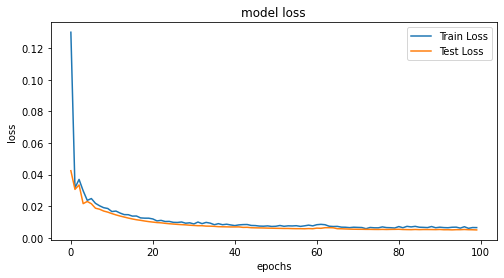

In [115]:
import matplotlib.pyplot as plt
#import seaborn as sns
#plt.figure(figsize=(8,4))
#plt.plot(history.history['loss'], label='Train Loss')
#plt.plot(history.history['val_loss'], label='Test Loss')
#plt.title('model loss')
#plt.ylabel('loss')
#plt.xlabel('epochs')
#plt.legend(loc='upper right')
#plt.show()

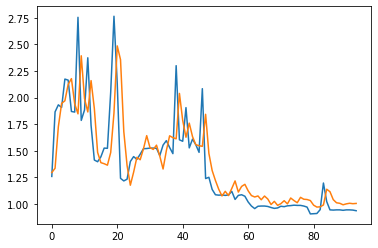

In [116]:
#plt.plot(y_test[:,0])
#plt.plot(y_test_pred[:,0])

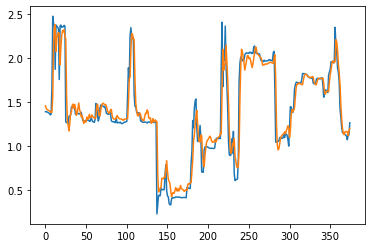

In [117]:
#plt.plot(y_train[:,0])
#plt.plot(y_train_pred[:,0])

In [65]:
comb = np.concatenate((y_train_pred, y_test_pred), axis=0)

dft.insert(loc=1,column='y_pred',value=comb)

In [97]:
n_forecast = 10
y = dft['y'].values
#print(y[-3:-1])
for i in range(1,n_forecast+1):
    x = y[-window_size-1:-1]
    x = x.reshape(1,1,-1)
    y = np.append(y,model.predict(x).flatten())
    #print(y[-3-i:-1])

y_fore = y[-n_forecast-1:-1]

print(y_fore)

[0.28110236 0.3274757  0.32265887 0.32203442 0.31960097 0.31615767
 0.31843242 0.31857562 0.31676283 0.32333103]


In [ ]:
history = model.fit(X_train, y_train, epochs=100, batch_size=70, validation_data=(X_test, y_test), 
                    callbacks=[EarlyStopping(monitor='val_loss', patience=10)], verbose=1, shuffle=False)

model.summary()